# The bootstrap approach is going to be applied to a test function

In [1]:
import pandas as pd
import numpy as np
import chaospy as cp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The classic G function is tested with three parameters

In [2]:
x1 = cp.Uniform(0,1).sample(10000, rule = "S")
x2 = cp.Uniform(0,1).sample(10000, rule = "S")
x3 = cp.Uniform(0,1).sample(10000, rule = "S")
x1b = cp.Uniform(0,1).sample(10000, rule = "S")
x2b = cp.Uniform(0,1).sample(10000, rule = "S")
x3b = cp.Uniform(0,1).sample(10000, rule = "S")
Parameters = {"x1": x1, "x2": x2, "x3": x3}
Parametersb = {"x1b": x1b, "x2b": x2b, "x3b": x3b}
for x in Parameters.values():
    np.random.shuffle(x)
for xb in Parametersb.values():
    np.random.shuffle(xb)

In [3]:
def G(x1, x2, x3):
    a1 = 1.1
    a2 = 1
    a3 = 0.9
    return (abs(4*x1-2)+a1/(1+a1))*(abs(4*x2-2)+a2/(1+a2))*(abs(4*x3-2)+a3/(1+a3))

variance = np.mean(G(x1,x2,x3)*G(x1,x2,x3))-np.mean(G(x1,x2,x3))*np.mean(G(x1,x2,x3))

ST1 = (variance - np.mean(G(x1,x2,x3)*G(x1b,x2,x3)) + np.mean(G(x1,x2,x3))*np.mean(G(x1,x2,x3)))/variance
ST2 = (variance - np.mean(G(x1,x2,x3)*G(x1,x2b,x3)) + np.mean(G(x1,x2,x3))*np.mean(G(x1,x2,x3)))/variance
ST3 = (variance - np.mean(G(x1,x2,x3)*G(x1,x2,x3b)) + np.mean(G(x1,x2,x3))*np.mean(G(x1,x2,x3)))/variance
S1 = (np.mean(G(x1,x2,x3)*G(x1,x2b,x3b)) - np.mean(G(x1,x2,x3))*np.mean(G(x1,x2,x3)))/variance
S2 = (np.mean(G(x1,x2,x3)*G(x1b,x2,x3b)) - np.mean(G(x1,x2,x3))*np.mean(G(x1,x2,x3)))/variance
S3 = (np.mean(G(x1,x2,x3)*G(x1b,x2b,x3)) - np.mean(G(x1,x2,x3))*np.mean(G(x1,x2,x3)))/variance

1000 values are bootstrapped 1000 times from the starting distributions. The distribution adopted are uniform in the interval (0,1)

In [4]:
def bootstrap(x):
    return np.random.choice(x)

In [5]:
st1 = []
st2 = []
st3 = []
s1 = []
s2 = []
s3 = []
for i1 in range (0,1000):
    Bx1 = np.asarray([bootstrap(x1) for i in range (0,1000)])
    Bx2 = np.asarray([bootstrap(x2) for i in range (0,1000)])
    Bx3 = np.asarray([bootstrap(x3) for i in range (0,1000)])
    Bx1b = np.asarray([bootstrap(x1b) for i in range (0,1000)])
    Bx2b = np.asarray([bootstrap(x2b) for i in range (0,1000)])
    Bx3b = np.asarray([bootstrap(x3b) for i in range (0,1000)])
    Bvariance = np.mean(G(Bx1,Bx2,Bx3)*G(Bx1,Bx2,Bx3))-np.mean(G(Bx1,Bx2,Bx3))*np.mean(G(Bx1,Bx2,Bx3))
    BST1 = (variance - np.mean(G(Bx1,Bx2,Bx3)*G(Bx1b,Bx2,Bx3)) + np.mean(G(Bx1,Bx2,Bx3))*np.mean(G(Bx1,Bx2,Bx3)))/Bvariance
    BST2 = (variance - np.mean(G(Bx1,Bx2,Bx3)*G(Bx1,Bx2b,Bx3)) + np.mean(G(Bx1,Bx2,Bx3))*np.mean(G(Bx1,Bx2,Bx3)))/Bvariance
    BST3 = (variance - np.mean(G(Bx1,Bx2,Bx3)*G(Bx1,Bx2,Bx3b)) + np.mean(G(Bx1,Bx2,Bx3))*np.mean(G(Bx1,Bx2,Bx3)))/Bvariance
    BS1 = (np.mean(G(Bx1,Bx2,Bx3)*G(Bx1,Bx2b,Bx3b)) - np.mean(G(Bx1,Bx2,Bx3))*np.mean(G(Bx1,Bx2,Bx3)))/Bvariance
    BS2 = (np.mean(G(Bx1,Bx2,Bx3)*G(Bx1b,Bx2,Bx3b)) - np.mean(G(Bx1,Bx2,Bx3))*np.mean(G(Bx1,Bx2,Bx3)))/Bvariance
    BS3 = (np.mean(G(Bx1,Bx2,Bx3)*G(Bx1b,Bx2b,Bx3)) - np.mean(G(Bx1,Bx2,Bx3))*np.mean(G(Bx1,Bx2,Bx3)))/Bvariance
    st1.append(BST1)
    st2.append(BST2)
    st3.append(BST3)
    s1.append(BS1)
    s2.append(BS2)
    s3.append(BS3)

In [6]:
S_indexes = [st1, st2, st3, s1, s2, s3]
df = pd.DataFrame(S_indexes)
S_ind = df.T
S_ind.columns = ['ST1', 'ST2', 'ST3', 'S1', 'S2', 'S3']

# A boxplot allows to eventually convey the information in a form easy to read

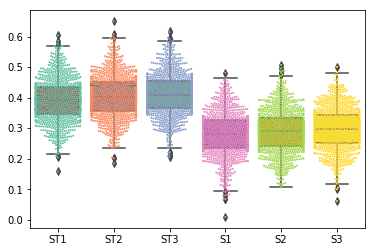

In [7]:
ax = sns.boxplot(data=S_ind, orient="v", palette="Set1")
ax = sns.swarmplot(data=S_ind, orient="v", palette="Set2", color=".25", size = 2)